## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isnull().sum()
# в данных пропусков нет

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
data.nunique().sort_values()
# если количество уникальных значений равно 2, то признак бинарный
# бинарные признаки: credit_risk, telephone, people_liable, foreign_worker

credit_risk                  2
telephone                    2
people_liable                2
foreign_worker               2
housing                      3
other_installment_plans      3
other_debtors                3
job                          4
number_credits               4
property                     4
status                       4
installment_rate             4
personal_status_sex          4
present_residence            4
employment_duration          5
savings                      5
credit_history               5
purpose                     10
duration                    33
age                         53
amount                     923
dtype: int64

In [ ]:
data.mean()
# так мы сможем определить, какие признаки являются количественными
# количественные признаки: duration, amount, age

<ipython-input-5-4aae0e645657>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


duration      20.903
amount      3271.248
age           35.542
dtype: float64

In [ ]:
data.axes[1]

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

**Вывод:**

**Количественные**: duration, amount, age

**Бинарные**: credit_risk,  telephone,  people_liable,  foreign_worker

**Порядковые**: employment_duration, installment_rate, present_residence, number_credits

**Категориальные**: status (встречается значение - "no checking account", не можем упорядочить), credit_history,  purpose,  savings (стречается значение - "unknown/no savings account", не можем упорядочить),  personal_status_sex,  other_debtors,  property,  other_installment_plans,  housing,  job



### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
import numpy as np

In [ ]:
np.round(data.groupby('purpose')['amount'].mean(), 2)

purpose
business               8209.33
car (new)              5370.22
car (used)             3066.98
domestic appliances    2728.09
furniture/equipment    2487.69
others                 3062.95
radio/television       1498.00
repairs                3180.40
retraining             4158.04
vacation               1205.89
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
print(round((((data["age"] < 30) & (data["housing"] == 'rent')).sum() / (data["age"] < 30).sum()*100),2),"%", sep = "")
print(round((((data["age"] > 40) & (data["housing"] == 'rent')).sum() / (data["age"] > 40).sum()*100),2),"%", sep = "")

66.67%
68.01%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
print(set(data['number_credits']))
print(set(data["foreign_worker"]))

{'1', '>= 6', '2-3', '4-5'}
{'yes', 'no'}


In [ ]:
print(((data["foreign_worker"] == "yes") & ((data["number_credits"] == '4-5') | (data["number_credits"] == '>= 6'))).sum())
# только у одного иностранца число кредитов больше 3

1


### Задание 6 (1 балл)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

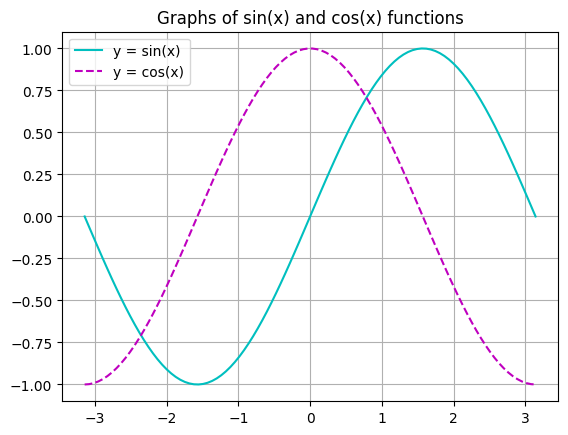

In [ ]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, label = "y = sin(x)", color = "c") # строим график синуса
plt.plot(x, y2, label = "y = cos(x)", linestyle = "--", color = "m") # строим пунктиром график косинуса
plt.grid() # добавляем сетку с единицами измерения на график
plt.legend() # добавляем легенду
plt.title("Graphs of sin(x) and cos(x) functions")
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

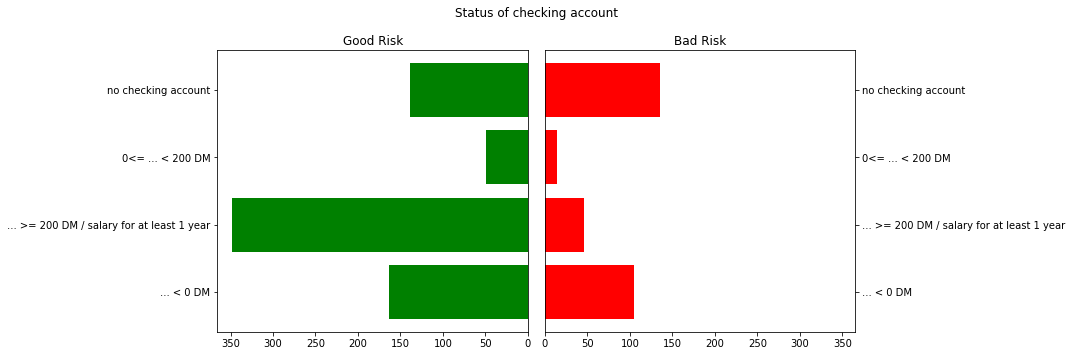

In [ ]:
# наш шаблон

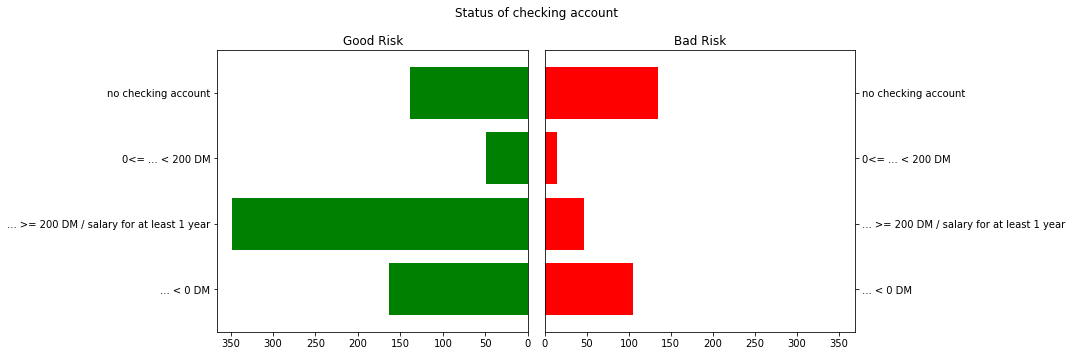

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5)) # задаем расположение графиков относительно друг друга
fig.suptitle('Status of checking account') # полное название зеркальной горизонтальной гистограммы

good_risk = data.groupby(['credit_risk', 'status']).size()['good']
good_risk.plot.barh(color='g', width = 0.8, ax=ax[0])
ax[0].set_title('Good Risk')
ax[0].invert_xaxis() # зеркалим ось ординат
ax[0].set_ylabel('') # убираем название оси ординат

bad_risk = data.groupby(['credit_risk', 'status']).size()['bad']
bad_risk.plot.barh(color='r', width = 0.8, ax=ax[1])
ax[1].set_title('Bad Risk')
ax[1].yaxis.tick_right() # пишем значения оси ординат на правой стороне
ax[1].set_xlim(0, 370) # устанавливаем диапазон оси x
ax[1].set_ylabel('') # убираем название оси ординат

fig.tight_layout() # отрегулируем интервал между подграфиками
plt.show() # выводим график

**Интерпретация графика**: хороший кредитный риск имеют заявители, обладающие статусом **"... >= 200 DM / salary for at least 1 year"**, они же имеют один из самых низких уровней отрицательных кейсов, что объясняется наличием достаточных средств на их checking accounts.

Рассматривая график "Bad Risk", можем сказать, что те клиенты, которые не имеют самый высокий уровень

### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

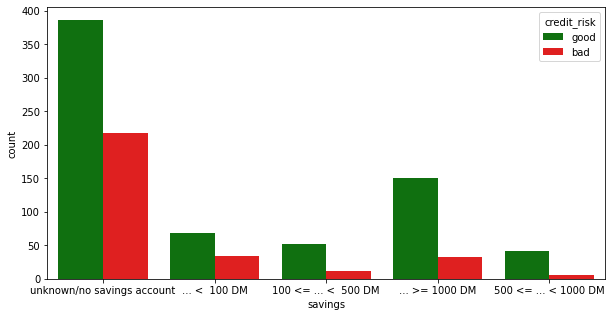

In [ ]:
# your code here

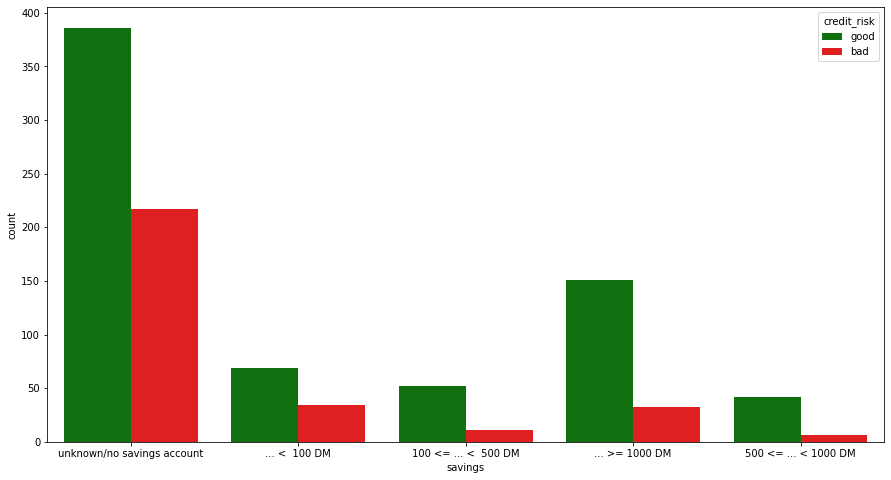

In [ ]:
# your code here
fig = sns.countplot(x = "savings", hue = "credit_risk", data = data, palette = ["green", "red"]) # задаем параметры графика
fig = plt.gcf()
fig.set_size_inches(15, 8) # определяем размер графика
plt.show() # выводим


1) **интерпретация графика**: по мере увеличения объема средств на сберегательном счете увеличивается разница между количеством положительных и отрицательных кейсов, то есть большой размер savings дает большее количество положительных кейсов и меньшее отрицательных

2) **seaborn позволяет более компактно построить график, для меня он более лаконичен и удобен в использовании**

3) **А с точки зрения восприятия результата?** - построение с помощью seaborn облегчает восприятие графика


### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

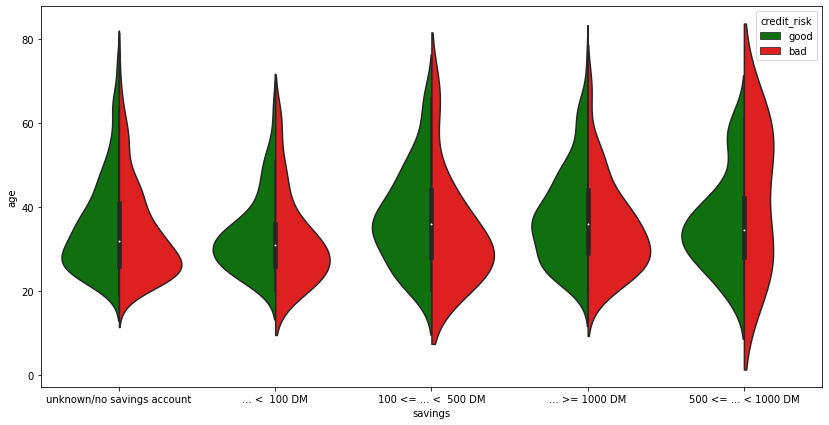

In [ ]:
# шаблон графика

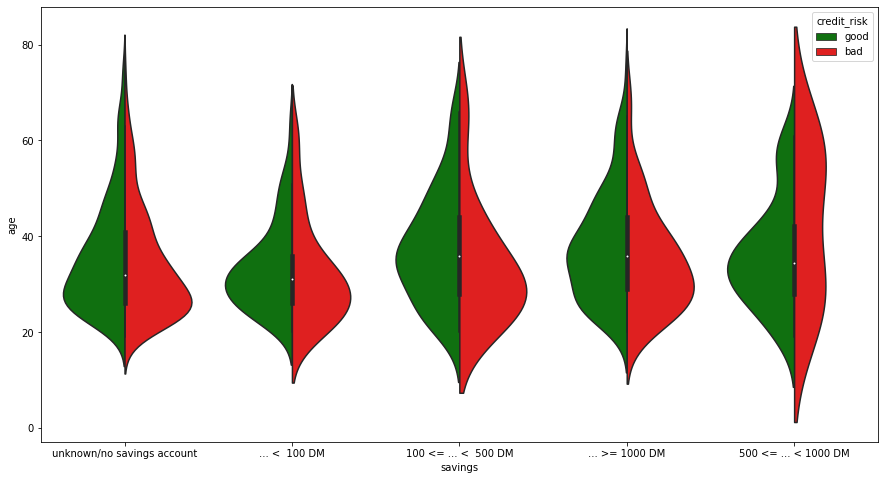

In [ ]:
fig = sns.violinplot(data = data, x = "savings", y= 'age', hue = "credit_risk", palette = ["g", "r"], split=True) # задаем вид графика и его параметры
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

**Комментарий к графику**\
Для последнего рисунка на данном графике возраст не является определяющим признаком для присваивания статуса "Bad", так как уровень сбережений самый высокий.
Остальные построения визуально обладают характеристиками нормального распределения, с ростом сбережений вершина "купола" растет, что может быть объяснено увеличением количества сбережений в более старшем возрасте.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

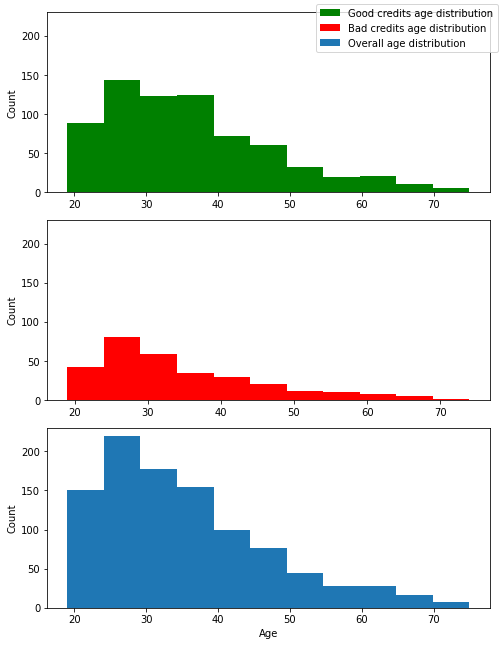

In [ ]:
# шаблоны графиков

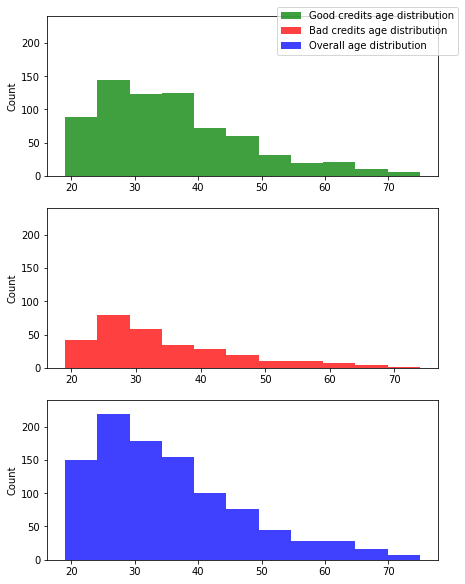

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(7,10))

ax[0].set_ylim(0, 240)  # задаем диапазон оси y
sns.histplot(data[(data['credit_risk'] == 'good')]['age'],  ax=ax[0], bins = 11, edgecolor='none', color='g', label = 'Good credits age distribution')
ax[0].set_xlabel('') # убираем название оси x

ax[1].set_ylim(0, 240)
sns.histplot(data[(data['credit_risk'] == 'bad')]['age'],  ax=ax[1], bins = 11, edgecolor='none', color='r', label = 'Bad credits age distribution')
ax[1].set_xlabel('')

ax[2].set_ylim(0, 240)
sns.histplot(data['age'],  ax=ax[2], bins = 11, edgecolor='none', color='b', label = 'Overall age distribution')
ax[2].set_xlabel('')

fig.legend(bbox_to_anchor = (0.95, 0.9)) # добавляем легенду
plt.show()

**Интерпретация графиков:**

По графикам можно заметить тренд увеличения положительных кейсов для клиентов примерно 25-40 лет, что также подтверждается более многочисленной группой этого возрастного интервала - синий график (на нем же можно видеть, что людей старше 40 лет значительно меньше в общей совокупности)

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

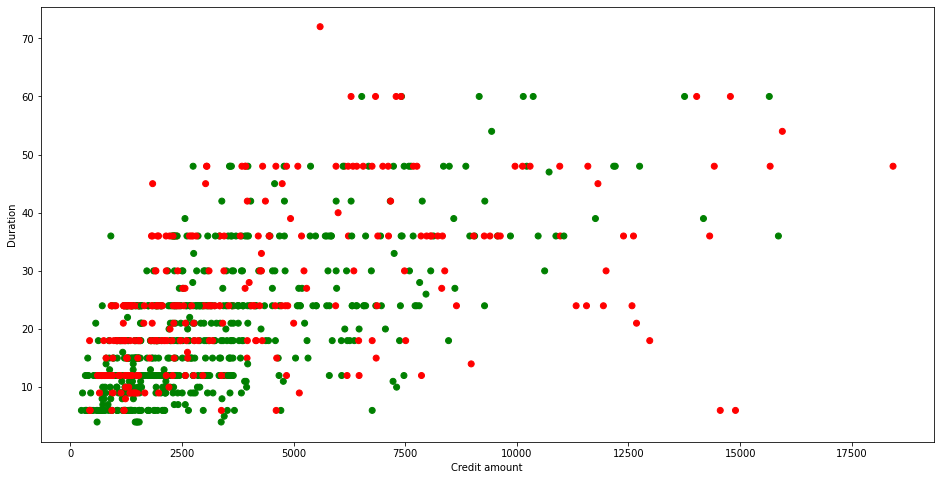

In [ ]:
# шаблон

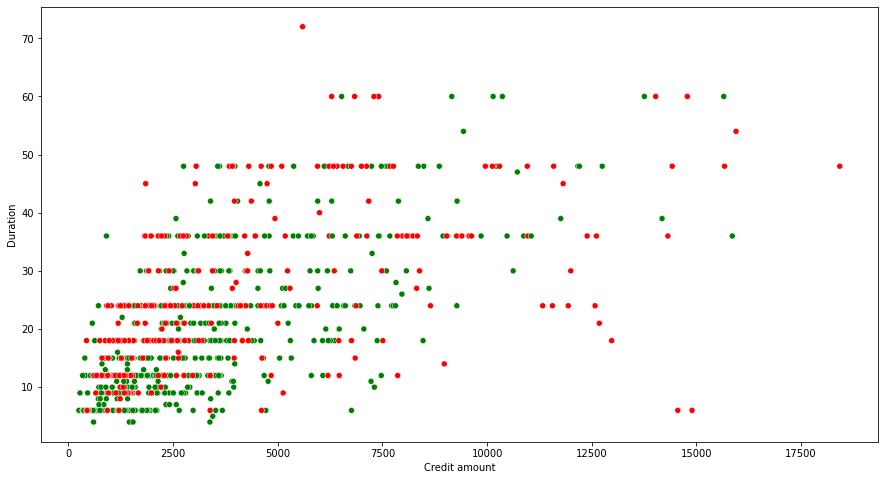

In [ ]:
sns.scatterplot(x = 'amount', y = 'duration', hue = "credit_risk", data = data, palette = ["g", "r"], legend = False)
plt.xlabel("Credit amount")
plt.ylabel('Duration')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

**Интерпретация графика**

Данная диаграмма рассеяния показывает, что наиболее частовстречающиеся комбинации "размер кредита - продолжительность" находятся в пределах до 5000 DM с продолжительностью кредита до 30 месяцев

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

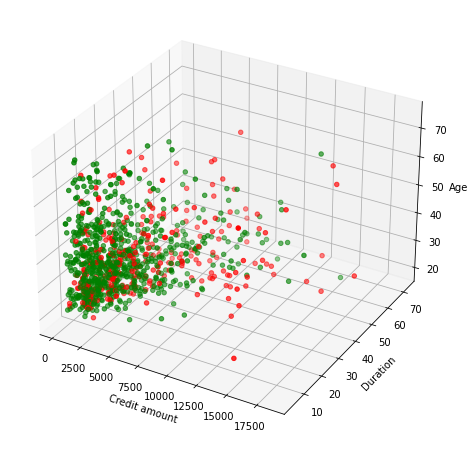

In [ ]:
# шаблон графика

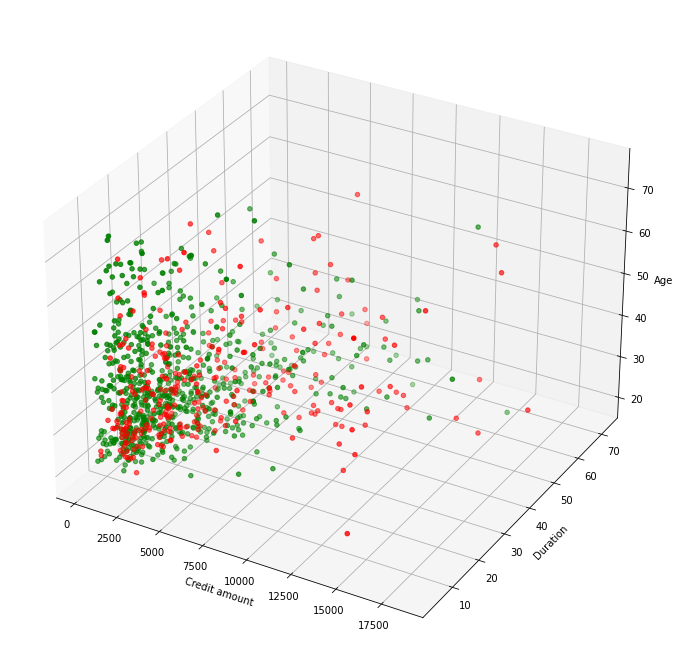

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x = data['amount']
y = data['duration']
z = data['age']

ax.scatter(data.amount[data.credit_risk=="bad"], data.duration[data.credit_risk=="bad"], data.age[data.credit_risk=="bad"], color = "red")
ax.scatter(data.amount[data.credit_risk=="good"], data.duration[data.credit_risk=="good"], data.age[data.credit_risk=='good'], color = "green")

ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

fig = plt.gcf()
fig.set_size_inches(30, 12)
plt.show()


**Интерпретация графика**

Данная диаграмма рассеяния показывает, что наиболее частовстречающиеся комбинации "размер кредита - продолжительность - возраст"  находятся в пределах до 5000 DM с продолжительностью до 30 месяцев, при этом возраст клиета составляет от 20 до 45 лет.

### Задание 13  (0.5 балла)

**Количественные**: duration, amount, age

**Бинарные**: credit_risk,  telephone,  people_liable,  foreign_worker

**Порядковые**: employment_duration, installment_rate, present_residence, number_credits, job


**Категориальные**: status (встречается значение - "no checking account", не можем упорядочить), credit_history,  purpose,  savings (стречается значение - "unknown/no savings account", не можем упорядочить),  personal_status_sex,  other_debtors,  property,  other_installment_plans,  housing

In [ ]:
# print(set(data['installment_rate']))
# print(set(data['present_residence']))
# print(set(data['number_credits']))
# print(set(data['people_liable']))
# print(set(data['telephone']))
# print(set(data['status']))
# print(set(data['employment_duration']))
# print(set(data['job']))

# print(set(data['credit_risk']))
# print(set(data['telephone']))
# print(set(data['people_liable']))
# print(set(data['foreign_worker']))


{'yes', 'no'}


Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
# порядковые
data["employment_duration"] = data["employment_duration"].map({'unemployed': 0,
                                                               '< 1 yr': 1,
                                                               '1 <= ... < 4 yrs': 2,
                                                               '4 <= ... < 7 yrs': 3,
                                                               '>= 7 yrs': 4})
data["present_residence"] = data["present_residence"].map({'< 1 yr': 0,
                                                            '1 <= ... < 4 yrs': 1,
                                                            '4 <= ... < 7 yrs': 2,
                                                            '>= 7 yrs': 3})
data["number_credits"] = data["number_credits"].map({'1': 0,
                                                      '2-3' : 1,
                                                      '4-5' : 2,
                                                       '>= 6': 3})
data["installment_rate"] = data["installment_rate"].map({'< 20': 0,
                                                      '20 <= ... < 25' : 1,
                                                       '25 <= ... < 35': 2,
                                                       '>= 35': 3})
data["job"] = data["job"].map({'unemployed/unskilled - non-resident': 0,
                               'unskilled - resident' : 1,
                               'skilled employee/official': 2,
                               'manager/self-empl./highly qualif. employee':3})

# бинарные
data["credit_risk"] = data["credit_risk"].map({'bad': 0,
                                                "good" : 1})
data["telephone"] = data["telephone"].map({'no': 0,
                                            "yes (under customer name)" : 1})
data["people_liable"] = data["people_liable"].map({'0 to 2': 0,
                                                "3 or more" : 1})
data["foreign_worker"] = data["foreign_worker"].map({'no': 0,
                                                "yes" : 1})

# избавляемся от категориальных признаков
data = data.drop("status", axis = 1)
data = data.drop("credit_history", axis = 1)
data = data.drop("purpose", axis = 1)
data = data.drop("savings", axis = 1)
data = data.drop("personal_status_sex", axis = 1)
data = data.drop("other_debtors", axis = 1)
data = data.drop("property", axis = 1)
data = data.drop("other_installment_plans", axis = 1)
data = data.drop("housing", axis = 1)

data

,duration,amount,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,1,0,3,21,0,2,0,0,0,1
1,9,2799,2,2,1,36,1,2,1,0,0,1
2,12,841,3,2,3,23,0,1,0,0,0,1
3,12,2122,2,1,1,39,1,1,1,0,1,1
4,12,2171,2,0,3,38,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,2,2,3,21,0,1,1,0,0,0
996,24,2303,4,0,0,45,0,2,0,0,0,0
997,21,12680,4,0,3,30,0,3,0,1,0,0
998,12,6468,0,2,0,52,0,3,0,1,0,0
